# Note
1. Melakukan percobaan build_models v4.0
2. Dilakukan pada hari Kamis, 02 Juli 2024
3. Tempat di Kost
4. Meliputi Class: 20 Kelas Aksara Jawa:
- Ba, Ca, Da, Dha, Ga, Ha, Ja, Ka, La, Ma, 
- Na, Nga, Nya, Pa, Ra, Sa, Ta, Tha, Wa, Ya

# Setup Environment 

In [1]:
# pip install tensorflow

In [1]:
# pip install keras

In [2]:
# pip install opencv-python

In [2]:
# pip install imutils

In [3]:
# pip install matplotlib

In [4]:
# pip install seaborn

In [5]:
# pip install scikit-learn

# Import Library

In [3]:
import pandas as pd
import matplotlib.pyplot as plt  
import os
from os.path import join
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
from keras.models import Sequential
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization , Activation,Conv2D
from keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score,roc_curve,confusion_matrix 

# Preprocessing

In [4]:
import os
import pandas as pd

def create_labels_csv(DATASET_PATH, OUTPUT_CSV):
    # List to store image file paths and their corresponding labels
    data = []

    # Traverse the dataset directory
    for root, dirs, files in os.walk(DATASET_PATH):
        for file in files:
            if file.endswith(('.jpg', '.jpeg', '.png')):
                # Get the class label from the subdirectory name
                label = os.path.basename(root)
                # Get the full file path
                file_path = os.path.join(root, file)
                # Append to the data list
                data.append([file_path, label])
    
    # Create a DataFrame from the data list
    df = pd.DataFrame(data, columns=['file_path', 'label'])
    
    # Save the DataFrame to a CSV file
    df.to_csv(OUTPUT_CSV, index=False)
    print(f'Labels CSV file created at: {OUTPUT_CSV}')

# Usage

DATASET_PATH = "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.7\\"
OUTPUT_CSV = "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.7\\labels.csv"

create_labels_csv(DATASET_PATH, OUTPUT_CSV)

Labels CSV file created at: C:\Users\wawn1\projects_skripsi\data\data_preprocessing\v2.7\labels.csv


In [5]:
import pandas as pd

path_main = DATASET_PATH
file = path_main + "labels.csv"
df = pd.read_csv(file)
df.head()

,file_path,label
0,C:\Users\wawn1\projects_skripsi\data\data_prep...,ba
1,C:\Users\wawn1\projects_skripsi\data\data_prep...,ba
2,C:\Users\wawn1\projects_skripsi\data\data_prep...,ba
3,C:\Users\wawn1\projects_skripsi\data\data_prep...,ba
4,C:\Users\wawn1\projects_skripsi\data\data_prep...,ba


Jumlah File C:\Users\wawn1\projects_skripsi\data\data_preprocessing\v2.7\ba is  138
Jumlah File C:\Users\wawn1\projects_skripsi\data\data_preprocessing\v2.7\ca is  132
Jumlah File C:\Users\wawn1\projects_skripsi\data\data_preprocessing\v2.7\da is  132
Jumlah File C:\Users\wawn1\projects_skripsi\data\data_preprocessing\v2.7\dha is  132
Jumlah File C:\Users\wawn1\projects_skripsi\data\data_preprocessing\v2.7\ga is  132
Jumlah File C:\Users\wawn1\projects_skripsi\data\data_preprocessing\v2.7\ha is  126
Jumlah File C:\Users\wawn1\projects_skripsi\data\data_preprocessing\v2.7\ja is  132
Jumlah File C:\Users\wawn1\projects_skripsi\data\data_preprocessing\v2.7\ka is  132
Jumlah File C:\Users\wawn1\projects_skripsi\data\data_preprocessing\v2.7\la is  132
Jumlah File C:\Users\wawn1\projects_skripsi\data\data_preprocessing\v2.7\ma is  132
Jumlah File C:\Users\wawn1\projects_skripsi\data\data_preprocessing\v2.7\na is  132
Jumlah File C:\Users\wawn1\projects_skripsi\data\data_preprocessing\v2.7\ng

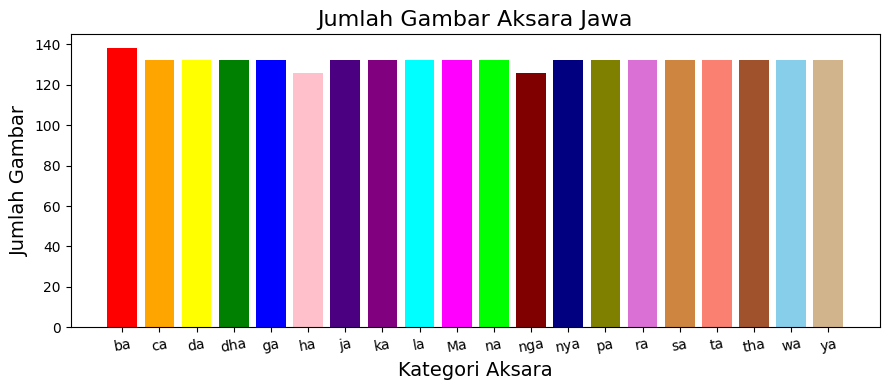

In [6]:
import matplotlib.pyplot as plt
import os
# Define an empty list
file_counts = []
def countFile(link):
    path = link
    num_files = len([f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))])
    file_counts.append(num_files)
    print(f"Jumlah File {link} is ", num_files)
    
countFile("C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.7\\ba")
countFile("C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.7\\ca")
countFile("C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.7\\da")
countFile("C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.7\\dha")
countFile("C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.7\\ga")
countFile("C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.7\\ha")
countFile("C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.7\\ja")
countFile("C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.7\\ka")
countFile("C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.7\\la")
countFile("C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.7\\ma")
countFile("C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.7\\na")
countFile("C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.7\\nga")
countFile("C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.7\\nya")
countFile("C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.7\\pa")
countFile("C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.7\\ra")
countFile("C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.7\\sa")
countFile("C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.7\\ta")
countFile("C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.7\\tha")
countFile("C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.7\\wa")
countFile("C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.7\\ya")

# Define the input path aksara
aksara_categories = ['ba', 'ca', 'da', 'dha', 'ga', 'ha', 'ja', 'ka', 'la', 'Ma', 'na',
                     'nga', 'nya', 'pa', 'ra', 'sa', 'ta', 'tha', 'wa', 'ya']

colors = ['red', 'orange', 'yellow', 'green', 'blue', 'pink', 'indigo', 'purple', 
          'cyan', 'magenta', 'lime', 'maroon', 'navy', 'olive', 'orchid', 'peru', 
          'salmon', 'sienna', 'skyblue', 'tan']  # Colors for each bar

# Create bar chart
plt.figure(figsize=(9, 4))
plt.bar(aksara_categories, file_counts, color=colors)
plt.xlabel('Kategori Aksara', fontsize=14)
plt.ylabel('Jumlah Gambar', fontsize=14)
plt.title('Jumlah Gambar Aksara Jawa', fontsize=16)
plt.xticks(fontsize=10, rotation=10)
plt.tight_layout()

# Show the plot
plt.show()


In [7]:
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Define the input path and aksaraJowo
INPUT_PATH = path_main  
AKSARA = aksara_categories

# Define the target image size
IMAGE_SIZE = (94, 94)
INPUT_SHAPE = (94, 94, 1)

def create_image_generator(input_path, aksaraJowo, image_size):
    for index, jowo in enumerate(aksaraJowo):
        aksara_path = os.path.join(input_path, jowo)
        
        for filename in os.listdir(aksara_path):
            image_path = os.path.join(aksara_path, filename)
            original_image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)  # Baca dan ubah warna asli
            original_image_resized = cv2.resize(original_image, image_size, interpolation=cv2.INTER_AREA)  # Resize gambar asli
            grayscale_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Baca gambar sebagai grayscale
            grayscale_image_resized = cv2.resize(grayscale_image, image_size, interpolation=cv2.INTER_AREA)  # Resize gambar grayscale
            image_filtered = apply_custom_preprocessing(grayscale_image_resized)
            
            yield original_image_resized, grayscale_image_resized, image_filtered, index


def load_images(input_path, aksaraJowo, image_size):
    X_original, X_grayscale, X_filtered, y_label = [], [], [], []
    
    for original_image, grayscale_image, image_filtered, label in create_image_generator(input_path, aksaraJowo, image_size):
        X_original.append(original_image)
        X_grayscale.append(grayscale_image)
        X_filtered.append(image_filtered)
        y_label.append(label)
        
    X_original = np.array(X_original)
    X_grayscale = np.array(X_grayscale)
    X_filtered = np.array(X_filtered)
    y_label = to_categorical(np.array(y_label))
    
    return X_original, X_grayscale, X_filtered, y_label

def apply_custom_preprocessing(image):
    # Apply Gaussian Blur
    ApplyGaussian = cv2.GaussianBlur(image, (9, 9), 10.0)
    # Enhance the image sharpness
    img = cv2.addWeighted(image, 1.5, ApplyGaussian, -0.5, 0, image)
    # Apply sharpening filter
    kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
    img = cv2.filter2D(img, -1, kernel)
    # Remove noise using median filter
    img = cv2.medianBlur(img, 1)
    # Apply Otsu's thresholding
    _, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # Invert the image (background to black, text to white)
    img = 255 - img
    
    return img

# Load images with custom preprocessing applied
X_original, X_grayscale, X_filtered, y_label = load_images(INPUT_PATH, AKSARA, IMAGE_SIZE)

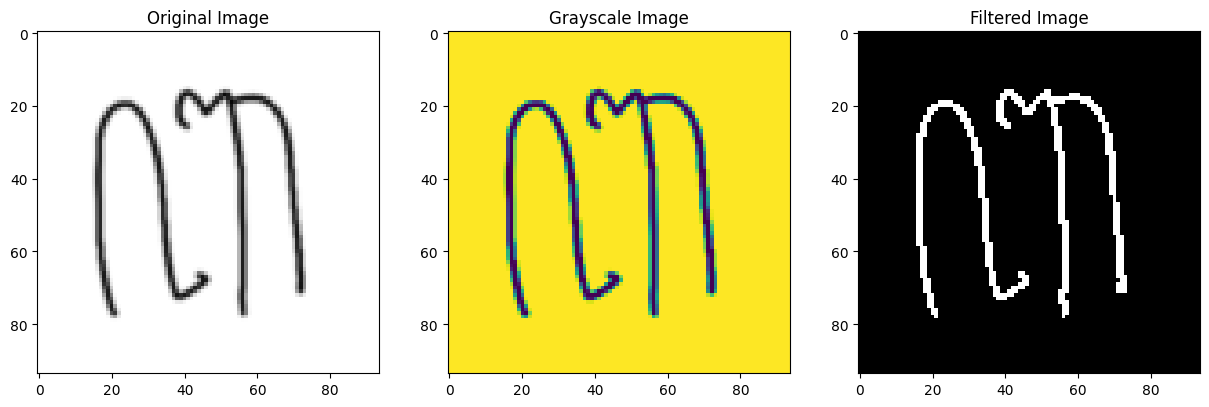

In [8]:
# Select one image to display
index_to_display = 0

# Display the original image, grayscale image, and filtered image
original_image = X_original[index_to_display]
grayscale_image = X_grayscale[index_to_display]
filtered_image = X_filtered[index_to_display]

# Plot the images
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(original_image)
plt.axis('on')

plt.subplot(1, 3, 2)
plt.title('Grayscale Image')
plt.imshow(grayscale_image)
plt.axis('on')

plt.subplot(1, 3, 3)
plt.title('Filtered Image')
# plt.imshow(filtered_image, cmap='gray')
plt.imshow(filtered_image, cmap='gray')
plt.axis('on')

plt.show()

In [9]:
print(f"Bentuk input pada gambar: {IMAGE_SIZE}")


Bentuk input pada gambar: (94, 94)


In [10]:
# Reshape X_filtered
X_filtered_reshaped = X_filtered.reshape(-1, 94, 94, 1)
print("X_filtered shape after reshape:", X_filtered_reshaped.shape)

X_filtered shape after reshape: (2634, 94, 94, 1)


In [11]:
# Train test split 
from sklearn.model_selection import train_test_split

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_filtered_reshaped, y_label, test_size=0.3, random_state=45)

In [12]:
print("x_train shape", X_train.shape)
print("x_test shape", X_test.shape)
print("y_train shape", y_train.shape)
print("y_test shape", y_test.shape)

x_train shape (1843, 94, 94, 1)
x_test shape (791, 94, 94, 1)
y_train shape (1843, 20)
y_test shape (791, 20)


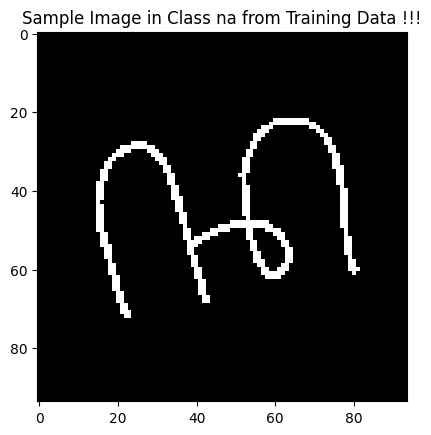

In [13]:
# Menampilkan salah satu gambar dari data pelatihan
plt.imshow(X_train[0], cmap='gray')
plt.title("Sample Image in Class {} from Training Data !!!".format(AKSARA[np.argmax(y_train[0])]))
plt.axis('on')
plt.show()

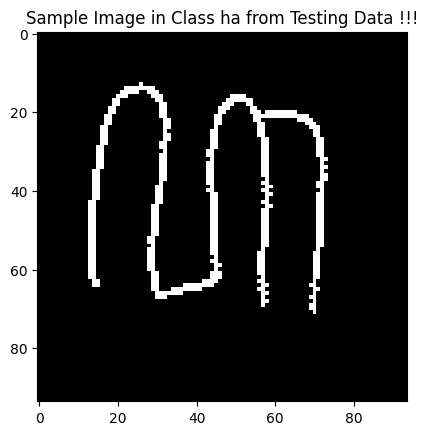

In [14]:
# Menampilkan salah satu gambar dari data pelatihan
plt.imshow(X_test[0], cmap='gray')
plt.title("Sample Image in Class {} from Testing Data !!!".format(AKSARA[np.argmax(y_test[0])]))
plt.axis('on')
plt.show()

# Build the Model

## Model 1

In [15]:
# import tensorflow as tf
# from tensorflow.keras.utils import plot_model

# from tensorflow.keras.applications import VGG16

# vgg16 = tf.keras.applications.VGG16(
#     input_shape=(128, 128, 3),
#     pooling=max,
#     include_top=False,
#     weights="imagenet")
# vgg16.summary()

In [16]:
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.constraints import max_norm
from tensorflow.keras import layers, initializers, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

# Initialize Sequential model
model = Sequential()

# Add VGG16 as a layer
# model.add(vgg16)

# model = models.Sequential()

# Block 1
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=INPUT_SHAPE))
BatchNormalization()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
BatchNormalization()
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.2))

# Block 2
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
BatchNormalization()
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
BatchNormalization()
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.2))

# Block 3
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
BatchNormalization()
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
BatchNormalization()
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
BatchNormalization()
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.2))

# Block 4
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
BatchNormalization()
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
BatchNormalization()
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
BatchNormalization()
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.2))

# Block 5
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
BatchNormalization()
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
BatchNormalization()
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
BatchNormalization()
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.2))

# Flatten
model.add(Flatten())

# Dense layers
# model.add(Dense(512, activation='relu', kernel_initializer=initializers.RandomNormal(mean=0.0, stddev=0.0001, seed=None)))
model.add(Dense(512, activation='relu'))
BatchNormalization()
model.add(Dropout(0.3))

# model.add(Dense(512, activation='relu', kernel_initializer=initializers.RandomNormal(mean=0.0, stddev=1e-4, seed=None)))
model.add(Dense(512, activation='relu'))
BatchNormalization()
model.add(Dropout(0.3))

# Output layer
model.add(Dense(20, activation='softmax'))

c:\Users\wawn1\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
# Adam optimizer with learning rate scheduling, Weight Decay, and Gradient Clipping
# opt = tf.keras.optimizers.Adam(learning_rate=0.0001, weight_decay=1e-4, clipvalue=0.5)
adm = tf.keras.optimizers.Adam(learning_rate=0.0001, weight_decay=1e-4)
# sgd = tf.keras.optimizers.SGD(learning_rate=0.0001, weight_decay=1e-4)
# rms = tf.keras.optimizers.RMSprop(learning_rate=0.0001, weight_decay=1e-4)
    
# Compile the model
model.compile(optimizer=adm, loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 94, 94, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 94, 94, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 47, 47, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 47, 47, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 23, 23, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 23, 23, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 23, 23, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 11, 11, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 11, 11, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 11, 11, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 5, 5, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 5, 5, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 5, 5, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 20)             │        10,260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,131,124 (34.83 MB)

 Trainable params: 9,131,124 (34.83 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
batch_size = 64
epochs = 30

history_v1 = model.fit(X_train, 
                       y_train, 
                       batch_size=batch_size, 
                       epochs=epochs, 
                       validation_data=(X_test, y_test))

Epoch 1/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 184s 6s/step - accuracy: 0.0509 - loss: 3.0167 - val_accuracy: 0.0834 - val_loss: 2.9888
Epoch 2/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 193s 6s/step - accuracy: 0.1027 - loss: 2.9454 - val_accuracy: 0.2137 - val_loss: 2.5677
Epoch 3/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 168s 6s/step - accuracy: 0.2620 - loss: 2.3274 - val_accuracy: 0.5613 - val_loss: 1.4671
Epoch 4/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 205s 6s/step - accuracy: 0.5353 - loss: 1.3831 - val_accuracy: 0.7927 - val_loss: 0.6291
Epoch 5/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 198s 6s/step - accuracy: 0.7380 - loss: 0.7845 - val_accuracy: 0.9115 - val_loss: 0.2682
Epoch 6/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 169s 6s/step - accuracy: 0.8661 - loss: 0.4063 - val_accuracy: 0.9570 - val_loss: 0.1436
Epoch 7/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 200s 6s/step - accuracy: 0.9007 - loss: 0.2899 - val_accuracy: 0.9633 - val_loss: 0.1268
Epoch 8/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 202s 6s/step - accuracy: 0.9417 - loss: 0.1667 - val_accuracy: 0.9772 - v

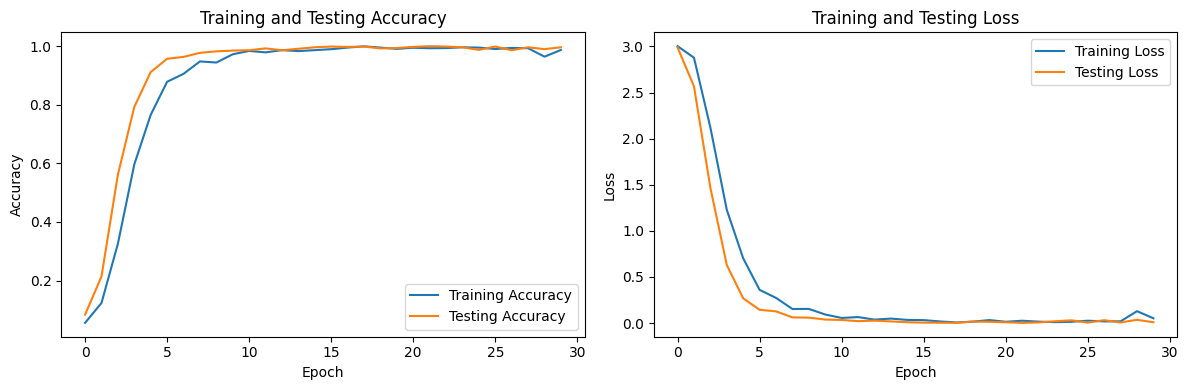

In [19]:
import matplotlib.pyplot as plt

# Memastikan bahwa history_v1.history memiliki data yang diperlukan
acc = history_v1.history.get('accuracy', [])
test_acc = history_v1.history.get('val_accuracy', [])
loss = history_v1.history.get('loss', [])
test_loss = history_v1.history.get('val_loss', [])

# Menentukan range epochs berdasarkan panjang data akurasi
epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))

# Plot Training and Testing Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, test_acc, label='Testing Accuracy')
plt.title('Training and Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot Training and Testing Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, test_loss, label='Testing Loss')
plt.title('Training and Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Mengatur layout agar rapi
plt.tight_layout()
plt.show()

In [20]:
# Evaluasi model menggunakan data uji
loss, acc = model.evaluate(X_test, y_test)

# Print hasil evaluasi
print("Loss:", loss)
print("Accuracy:", acc)

25/25 ━━━━━━━━━━━━━━━━━━━━ 17s 683ms/step - accuracy: 0.9954 - loss: 0.0114
Loss: 0.008717834949493408
Accuracy: 0.9962073564529419


25/25 ━━━━━━━━━━━━━━━━━━━━ 17s 680ms/step
              precision    recall  f1-score   support

          ba       1.00      1.00      1.00        47
          ca       1.00      1.00      1.00        29
          da       1.00      1.00      1.00        36
         dha       0.93      1.00      0.96        39
          ga       1.00      1.00      1.00        36
          ha       1.00      1.00      1.00        39
          ja       1.00      1.00      1.00        41
          ka       1.00      1.00      1.00        45
          la       1.00      1.00      1.00        36
          Ma       1.00      1.00      1.00        30
          na       1.00      1.00      1.00        41
         nga       1.00      0.92      0.96        38
         nya       1.00      1.00      1.00        42
          pa       1.00      1.00      1.00        52
          ra       1.00      1.00      1.00        27
          sa       1.00      1.00      1.00        41
          ta       1.00      1.00      

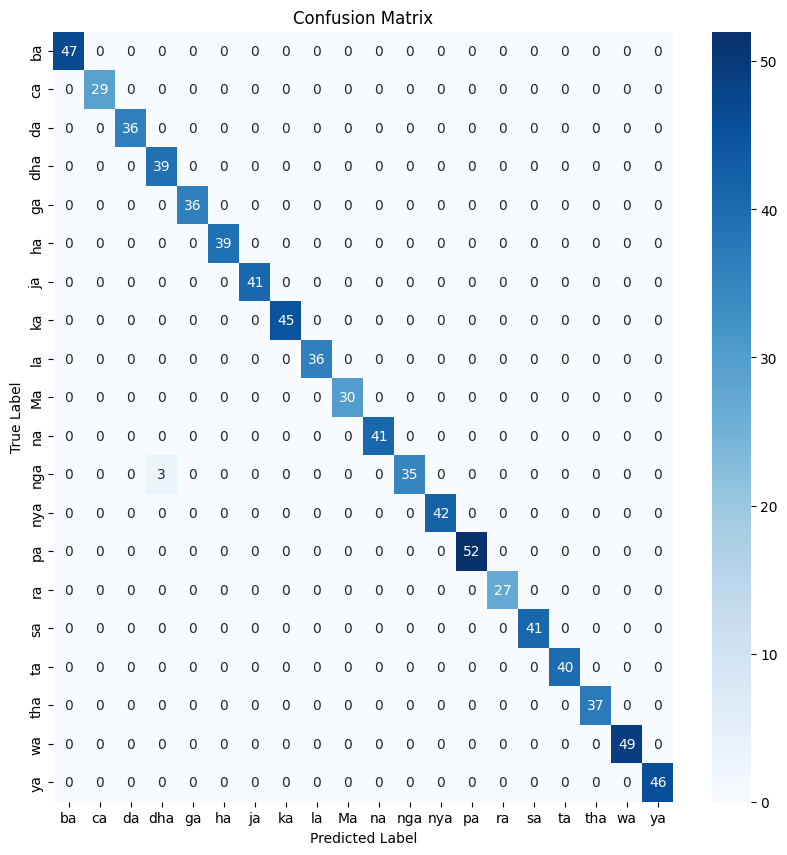

In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, accuracy_score
from sklearn import metrics
import numpy as np

# Prediksi menggunakan model pada data uji
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Tampilkan classification report yang lengkap
report = metrics.classification_report(y_true_classes, y_pred_classes, target_names=AKSARA)
print(report)

# Hitung Confusion Matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Tampilkan Confusion Matrix menggunakan seaborn heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=AKSARA, yticklabels=AKSARA)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Model 2

In [37]:
# import tensorflow as tf
# from tensorflow.keras.utils import plot_model

# from tensorflow.keras.applications import VGG16

# vgg16 = tf.keras.applications.VGG16(
#     input_shape=(94, 94, 3),
#     pooling=max,
#     include_top=False,
#     weights="imagenet")
# vgg16.summary()

In [38]:
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.constraints import max_norm
from tensorflow.keras import layers, initializers, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

# Initialize Sequential model
model = Sequential()

# Add VGG16 as a layer
# model.add(vgg16)

# model = models.Sequential()

# Block 1
model.add(Conv2D(32, (3, 3), padding='same', activation='selu', input_shape=INPUT_SHAPE))
BatchNormalization()
model.add(Conv2D(32, (3, 3), padding='same', activation='selu'))
BatchNormalization()
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.2))

# Block 2
model.add(Conv2D(64, (3, 3), padding='same', activation='selu'))
BatchNormalization()
model.add(Conv2D(64, (3, 3), padding='same', activation='selu'))
BatchNormalization()
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.2))

# Block 3
model.add(Conv2D(128, (3, 3), padding='same', activation='selu'))
BatchNormalization()
model.add(Conv2D(128, (3, 3), padding='same', activation='selu'))
BatchNormalization()
model.add(Conv2D(128, (3, 3), padding='same', activation='selu'))
BatchNormalization()
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.2))

# Block 4
model.add(Conv2D(256, (3, 3), padding='same', activation='selu'))
BatchNormalization()
model.add(Conv2D(256, (3, 3), padding='same', activation='selu'))
BatchNormalization()
model.add(Conv2D(256, (3, 3), padding='same', activation='selu'))
BatchNormalization()
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.2))

# Block 5
model.add(Conv2D(512, (3, 3), padding='same', activation='selu'))
BatchNormalization()
model.add(Conv2D(512, (3, 3), padding='same', activation='selu'))
BatchNormalization()
model.add(Conv2D(512, (3, 3), padding='same', activation='selu'))
BatchNormalization()
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.2))

# Flatten
model.add(Flatten())

# Dense layers
# model.add(Dense(512, activation='selu', kernel_initializer=initializers.RandomNormal(mean=0.0, stddev=0.0001, seed=None)))
model.add(Dense(256, activation='selu'))
BatchNormalization()
model.add(Dropout(0.3))

# model.add(Dense(256, activation='selu', kernel_initializer=initializers.RandomNormal(mean=0.0, stddev=1e-4, seed=None)))
model.add(Dense(128, activation='selu'))
BatchNormalization()
model.add(Dropout(0.3))

# Output layer
model.add(Dense(20, activation='softmax'))

In [39]:
# Adam optimizer with learning rate scheduling, Weight Decay, and Gradient Clipping
# opt = tf.keras.optimizers.Adam(learning_rate=0.0001, weight_decay=1e-4, clipvalue=0.5)
# adm = tf.keras.optimizers.Adam(learning_rate=0.0001, weight_decay=1e-4)
sgd = tf.keras.optimizers.SGD(learning_rate=0.0001, weight_decay=1e-4, clipvalue=1e-4)
# rms = tf.keras.optimizers.RMSprop(learning_rate=0.0001, weight_decay=1e-4)
    
# Compile the model
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_78 (Conv2D)              │ (None, 94, 94, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_79 (Conv2D)              │ (None, 94, 94, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 47, 47, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_80 (Conv2D)              │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_81 (Conv2D)              │ (None, 47, 47, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_82 (Conv2D)              │ (None, 23, 23, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_83 (Conv2D)              │ (None, 23, 23, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_84 (Conv2D)              │ (None, 23, 23, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 11, 11, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_85 (Conv2D)              │ (None, 11, 11, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_86 (Conv2D)              │ (None, 11, 11, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_87 (Conv2D)              │ (None, 11, 11, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_88 (Conv2D)              │ (None, 5, 5, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_89 (Conv2D)              │ (None, 5, 5, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_90 (Conv2D)              │ (None, 5, 5, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 20)             │         2,580 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,369,140 (31.93 MB)

 Trainable params: 8,369,140 (31.93 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
batch_size = 94
epochs = 30

history_v2 = model.fit(X_train, 
                       y_train, 
                       batch_size=batch_size, 
                       epochs=epochs, 
                       validation_data=(X_test, y_test))

Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 330s 16s/step - accuracy: 0.0612 - loss: 5.9543 - val_accuracy: 0.0518 - val_loss: 4.9159
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 395s 17s/step - accuracy: 0.0549 - loss: 5.8159 - val_accuracy: 0.0518 - val_loss: 4.8706
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 291s 14s/step - accuracy: 0.0531 - loss: 5.7984 - val_accuracy: 0.0518 - val_loss: 4.8266
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 384s 19s/step - accuracy: 0.0581 - loss: 5.6884 - val_accuracy: 0.0518 - val_loss: 4.7837
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 397s 20s/step - accuracy: 0.0560 - loss: 5.7990 - val_accuracy: 0.0518 - val_loss: 4.7404
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 272s 14s/step - accuracy: 0.0581 - loss: 5.7629 - val_accuracy: 0.0531 - val_loss: 4.6986
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 276s 11s/step - accuracy: 0.0673 - loss: 5.5463 - val_accuracy: 0.0544 - val_loss: 4.6584
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 280s 12s/step - accuracy: 0.0602 - loss: 5.7357 - val_accuracy: 0.

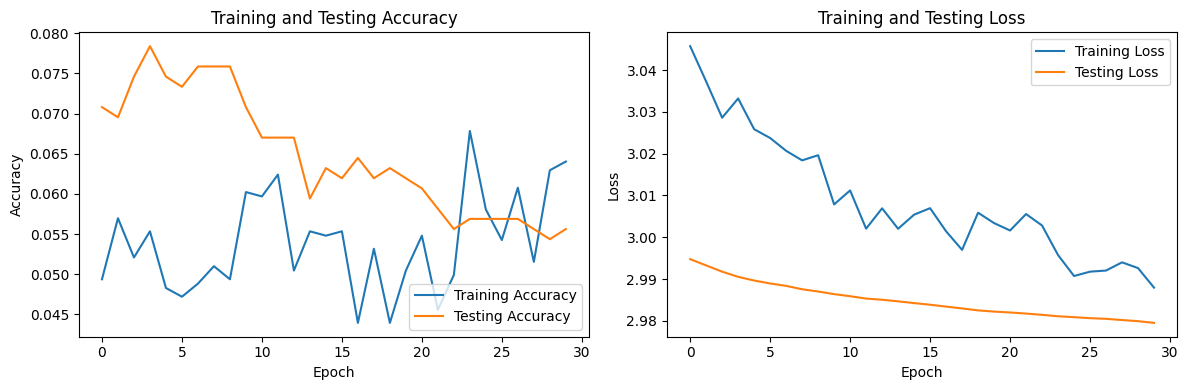

In [29]:
import matplotlib.pyplot as plt

# Memastikan bahwa history_v2.history memiliki data yang diperlukan
acc = history_v2.history.get('accuracy', [])
test_acc = history_v2.history.get('val_accuracy', [])
loss = history_v2.history.get('loss', [])
test_loss = history_v2.history.get('val_loss', [])

# Menentukan range epochs berdasarkan panjang data akurasi
epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))

# Plot Training and Testing Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, test_acc, label='Testing Accuracy')
plt.title('Training and Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot Training and Testing Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, test_loss, label='Testing Loss')
plt.title('Training and Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Mengatur layout agar rapi
plt.tight_layout()
plt.show()

In [30]:
# Evaluasi model menggunakan data uji
loss, acc = model.evaluate(X_test, y_test)

# Print hasil evaluasi
print("Loss:", loss)
print("Accuracy:", acc)

25/25 ━━━━━━━━━━━━━━━━━━━━ 17s 666ms/step - accuracy: 0.0665 - loss: 2.9767
Loss: 2.9795267581939697
Accuracy: 0.0556257888674736


25/25 ━━━━━━━━━━━━━━━━━━━━ 17s 663ms/step
              precision    recall  f1-score   support

          ba       0.00      0.00      0.00        47
          ca       0.00      0.00      0.00        29
          da       0.09      0.06      0.07        36
         dha       0.00      0.00      0.00        39
          ga       0.00      0.00      0.00        36
          ha       0.20      0.05      0.08        39
          ja       0.00      0.00      0.00        41
          ka       0.00      0.00      0.00        45
          la       0.00      0.00      0.00        36
          Ma       0.05      0.97      0.09        30
          na       0.00      0.00      0.00        41
         nga       0.00      0.00      0.00        38
         nya       0.00      0.00      0.00        42
          pa       0.00      0.00      0.00        52
          ra       0.00      0.00      0.00        27
          sa       0.00      0.00      0.00        41
          ta       0.00      0.00      

c:\Users\wawn1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\wawn1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\wawn1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

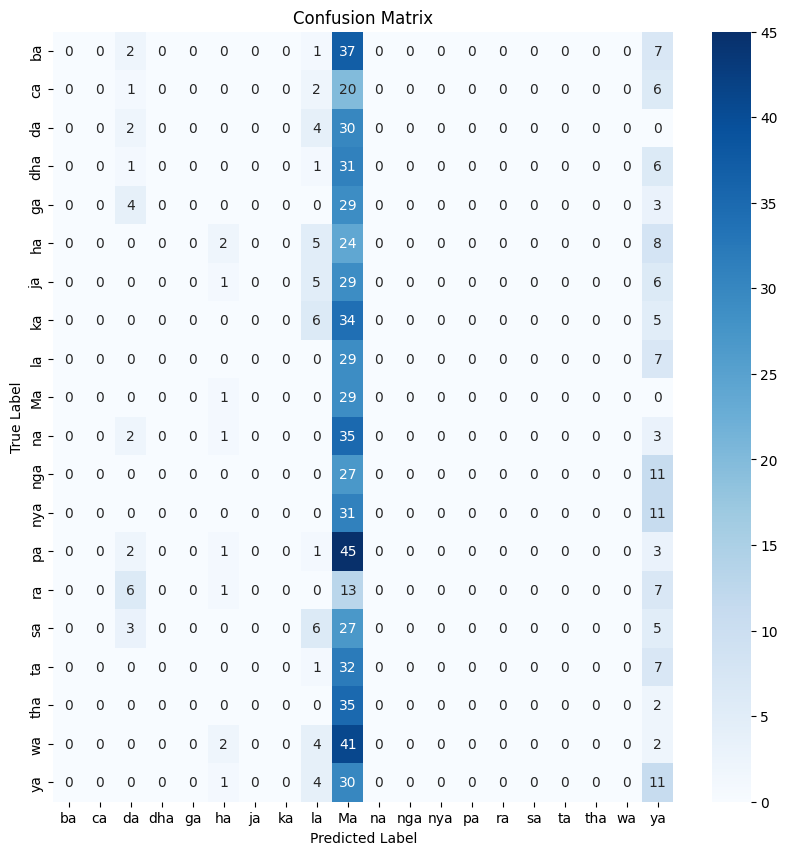

In [31]:
from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, accuracy_score
from sklearn import metrics
import numpy as np

# Prediksi menggunakan model pada data uji
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Tampilkan classification report yang lengkap
report = metrics.classification_report(y_true_classes, y_pred_classes, target_names=AKSARA)
print(report)

# Hitung Confusion Matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Tampilkan Confusion Matrix menggunakan seaborn heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=AKSARA, yticklabels=AKSARA)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()